# ML assignment 3
## Problem 1

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
df = pd.read_csv('Concrete_Data.csv')

# rename columns
df.rename(columns=lambda x: x.split('(')[0], inplace=True)

In [2]:
df.assign().head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.describe(percentiles=[])

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df.input=df.iloc[:,0:-1]
df.input.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [5]:
df.output=df.iloc[:,-1]
df.output.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete compressive strength, dtype: float64

In [6]:
# Show columns containing missing values
print("Columns containing missing value:", 
      df.columns[df.isna().any()].tolist())

Columns containing missing value: []


## Standardization 

In [7]:
from sklearn.preprocessing import StandardScaler
#df = StandardScaler().fit_transform(df)
#df.assign()

np_scaled = StandardScaler().fit_transform(df)
df = pd.DataFrame(np_scaled, columns=df.columns)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


### Visualiaztion for 9 attributes

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
#g1 = sns.pairplot(df)
#g1.savefig("pairplot.png")

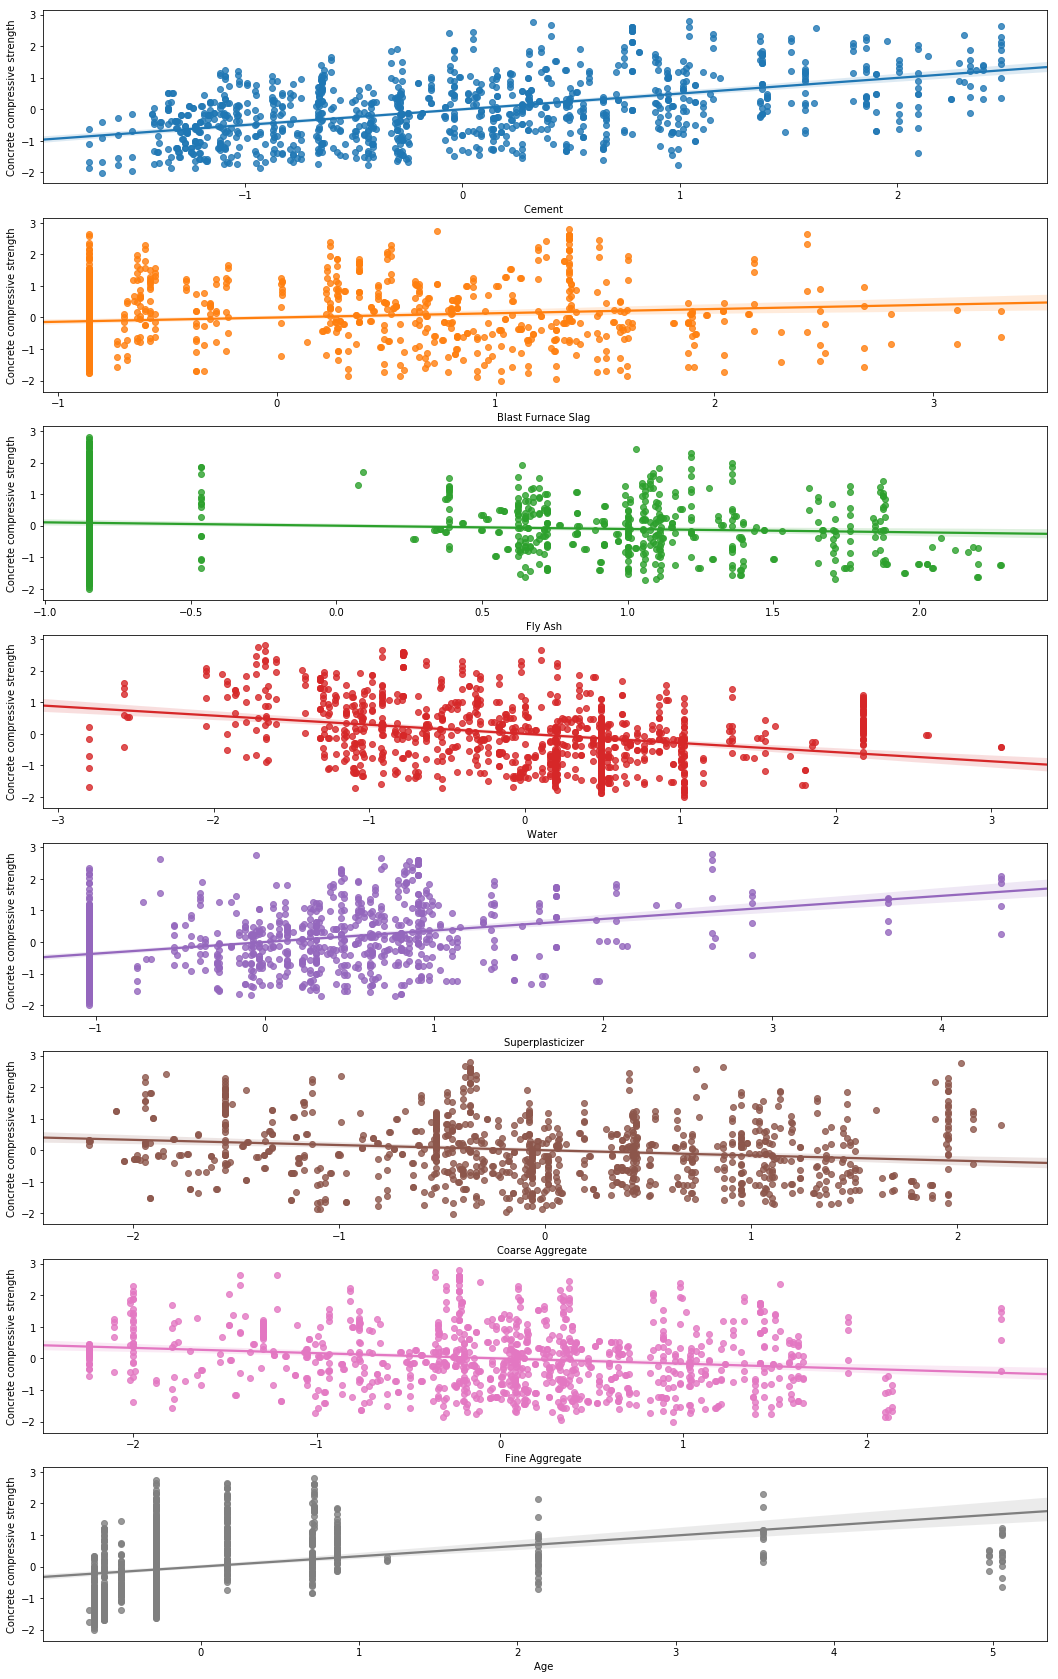

In [10]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 30))

for i in range(0, inputNum):
    sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])

plt.show()

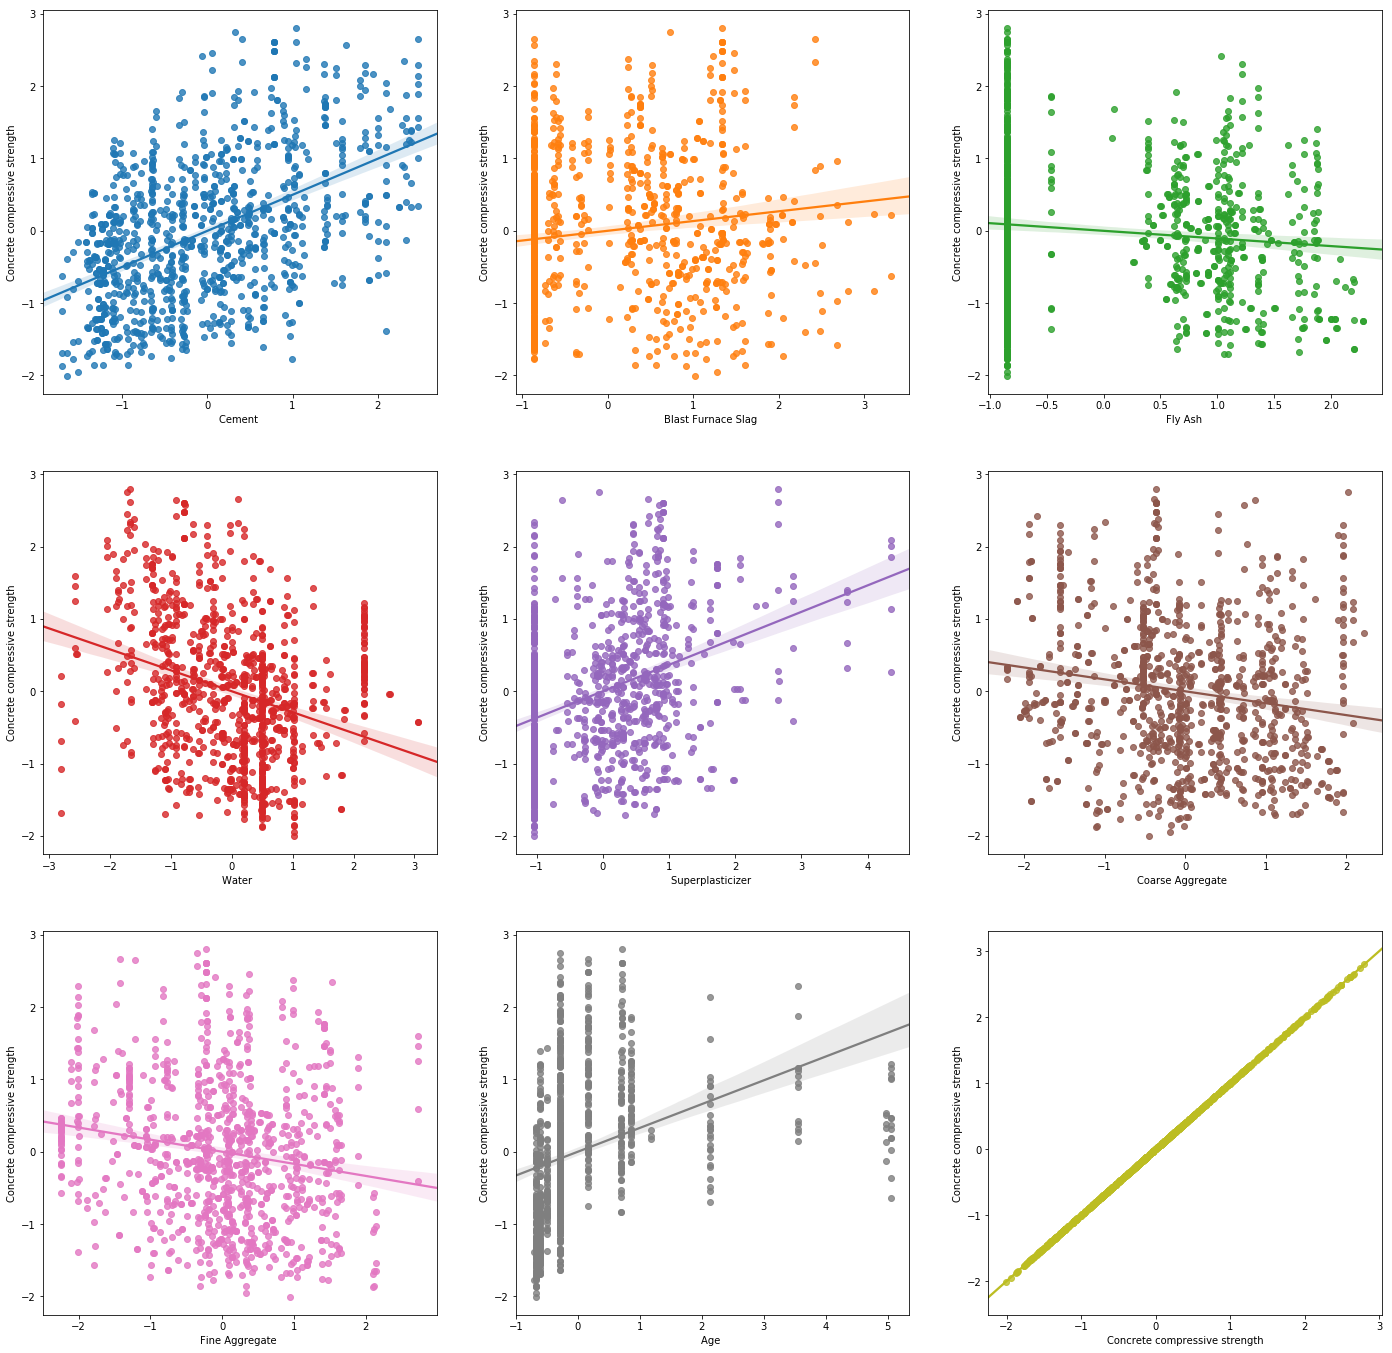

In [11]:
# Create a figure instance, and the two subplots
inputNum = 8

axes = []
fig, axes = plt.subplots(3, 3, figsize=(24, 24))

for i in range(0, 3):
    for j in range(0, 3):
        sns.regplot(x=df.columns[i*3+j], y=df.columns[inputNum], data=df, ax=axes[i][j])

plt.show()

## Data Selection & Data Partition
* For each input attribute
    * 80% data for training
    * 20% data for testing

In [12]:
X, y = df.iloc[:, 0], df.iloc[:, -1]

# X = X.values.reshape(-1, 1)
# y = y.values.reshape(-1, 1)

from sklearn.metrics import mean_squared_error, r2_score
row = ['lm1', 'lm2', 'lm3', 'lm4', 'lm5', 'lm6', 'lm7', 'lm8']
col = ['MSE', 'Cor', 'R2', 'bias', 'weight']
regResult = pd.DataFrame(index=row, columns=col)

In [13]:
from sklearn.model_selection import train_test_split
trainCol = ['X_train', 'y_train']
testCol = ['X_test', 'y_test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
Train = pd.DataFrame(columns=trainCol)
Train.iloc[:, 0]=X_train.values
Train.iloc[:, 1]=y_train.values

Test = pd.DataFrame(columns=testCol)
Test.iloc[:, 0]=X_test.values
Test.iloc[:, 1]=y_test.values

In [15]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

## Simple linear regression
* iteratively train linear model with each attribute

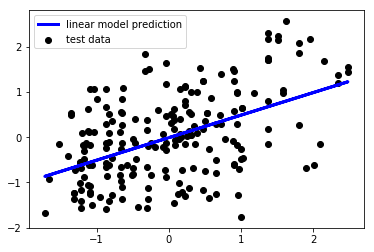

In [16]:
# simple linear regression by sklearn function
from sklearn.linear_model import LinearRegression

# Train linear model by training set
reg1 = LinearRegression().fit(X_train, y_train)
y_pred_lm = reg1.predict(X_test)
Test['y_pred_lm'] = y_pred_lm
# The coefficients
#print('Coefficients (weight): ', reg1.coef_)
#print('Intercept (bias): ', reg1.intercept_)
#print('linear model Correlation (R2-score): \n', reg1.score(X_train, y_train))


# Plot outputs
plt.scatter(X_test, y_test,  color='black', label='test data')
plt.plot(X_test, y_pred_lm, color='blue', linewidth=3, label='linear model prediction')

regResult.iloc[0, 0] = mean_squared_error(y_test, y_pred_lm)
regResult.iloc[0, 1] = reg1.score(X_train, y_train)
regResult.iloc[0, 2] = r2_score(y_test, y_pred_lm)
regResult.iloc[0, 3] = reg1.intercept_[0]
regResult.iloc[0, 4] = reg1.coef_[0]
regResult.assign()

plt.legend()
plt.show()


In [17]:
# cf. testing data(blue) & predicted data(orange)
#sns.regplot(x=X_test.reshape(1,-1)[0], y=y_test.reshape(1,-1)[0])

#sns.scatterplot(x='X_test', y='y_test', data=Test)
#sns.lineplot(x='X_test', y='y_pred_lm', data=Test, color='orange')



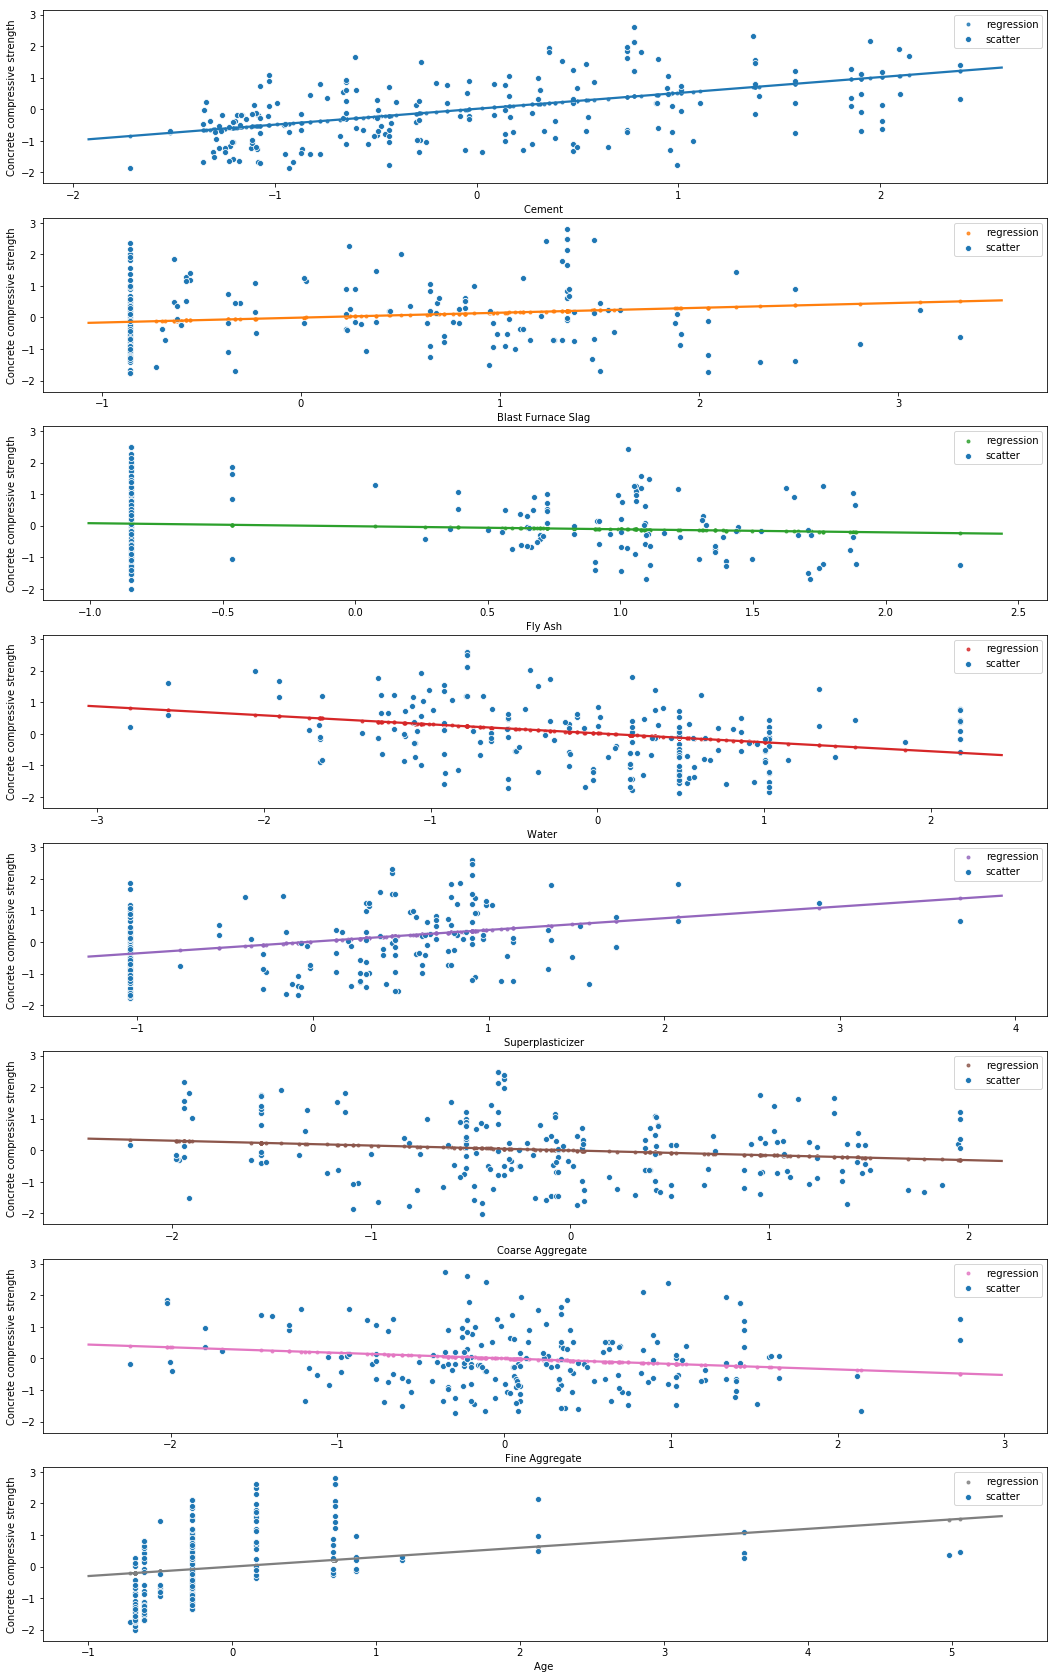

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

inputNum = 8

axes = []
fig, axes = plt.subplots(nrows=inputNum, sharey=True, figsize=(18, 30))

for i in range(0, inputNum):
    #sns.regplot(x=df.columns[i], y=df.columns[inputNum], data=df, ax=axes[i])


    X, y = df.iloc[:, i], df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #df2 = pd.concat([X_train, X_test, y_train, y_test], axis=1)
    Train = pd.concat([X_train, y_train], axis=1)
    Test = pd.concat([X_test, y_test], axis=1)
    
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)



    ### simple linear regression by sklearn function

    # Train linear model by training set
    reg1 = LinearRegression().fit(X_train, y_train)
    y_pred_lm = reg1.predict(X_test)
    Test['y_pred_lm'] = y_pred_lm

    # Plot outputs
    #sns.scatterplot(x=X_test.reshape(1,-1)[0], y=y_test.reshape(1,-1)[0], ax=axes[i])
    #sns.regplot(x=X_test.reshape(1,-1)[0], y=y_pred_lm.reshape(1,-1)[0], ax=axes[i])
    
    sns.regplot(x=Test.columns[0], y=Test.columns[2], 
                data=Test, ax=axes[i], label='regression', marker='.')
    sns.scatterplot(x=Test.columns[0], y=Test.columns[1], 
                    data=Test, ax=axes[i], label='scatter')


    #plt.plot(X_test, y_pred_lm, color='blue', linewidth=3)

    regResult.iloc[i, 0] = mean_squared_error(y_test, y_pred_lm)
    regResult.iloc[i, 1] = reg1.score(X_train, y_train)
    regResult.iloc[i, 2] = r2_score(y_test, y_pred_lm)
    regResult.iloc[i, 3] = reg1.intercept_[0]
    regResult.iloc[i, 4] = reg1.coef_[0]
    regResult.assign()

    #plt.legend()
    #plt.show()


In [19]:
regResult.assign()

,MSE,Cor,R2,bias,weight
lm1,0.7655,0.249138,0.235807,0.0157957,[0.5022813802064922]
lm2,0.96405,0.023177,-0.00606045,-0.00375544,[0.15532915977897838]
lm3,0.980508,0.00932806,0.0111866,-0.0178152,[-0.09669396866239052]
lm4,0.857075,0.0804218,0.0922353,0.017862,[-0.28435660324929607]
lm5,0.913723,0.142205,0.0975229,0.0135652,[0.37101990219663145]
lm6,0.98242,0.0239016,0.0374892,-0.00548855,[-0.15403414653584202]
lm7,0.899525,0.0318993,0.00877594,0.00176123,[-0.17543898323703913]
lm8,1.04656,0.100481,0.128261,-0.000196854,[0.2992530255089434]


In [20]:
max(regResult['Cor']), max(regResult['R2'])

(0.24913802344532043, 0.23580690843303276)

## Problem2
* Build own gradient descent function
* 現在只用第一個 attribute "Cement" 下去 train，可能要 train 3~5 分鐘

### Refresh Data

In [178]:
df.assign().head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


In [179]:
from sklearn.preprocessing import StandardScaler

np_scaled = StandardScaler().fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns=df.columns)
df_normalized.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


In [180]:
X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [181]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
916,0.074981,0.696961,-0.847144,0.629348,-0.034276,-0.629456,-0.169466,-0.279733
435,-1.089150,0.649418,1.163301,-0.284264,0.267184,0.429525,-0.336679,-0.279733
695,-1.581225,1.149201,-0.847144,0.488793,-1.039143,-0.812172,1.476465,-0.279733
690,0.065407,1.369523,-0.847144,0.488793,-1.039143,-0.526517,-0.696064,-0.612331
733,0.649387,-0.856888,-0.847144,0.488793,-1.039143,1.069032,0.441987,-0.279733


### Gradient Descent 

In [183]:
# Gradient Descent 
def descent(X, y, b_current, m_current, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(X.shape[0])
    for i in range(0, X.shape[0]):
        b_gradient += -(2/N) * (y.iloc[i] - ((m_current * X.iloc[i]) + b_current))
        m_gradient += -(2/N) * X.iloc[i] * (y.iloc[i] - ((m_current * X.iloc[i]) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return float(new_b), float(new_m), float(learning_rate * b_gradient), float(learning_rate * m_gradient)

def gd(X, y, starting_b=0, starting_m=0, learning_rate=0.01, epochs=1000):
    b = starting_b
    m = starting_m
    step1 = 0
    step2 = 0
    stopThreshold = 0.000001
    for i in range(epochs):
        b, m, step1, step2 = descent(X, y, b, m, learning_rate)
        if abs(step1) < stopThreshold or abs(step2) < stopThreshold:
            print(b, m, step1, step2)
            break
    return b, m

In [184]:
# BB: Bias (w0)
# MM: Slope (w1)
BB, MM = gd(X_train.iloc[:, 0:1], y_train)

0.006276806738391699 0.38121406145428555 -6.845612200659205e-08 -0.0023743394441281887


In [185]:
print(BB, MM)

0.006276806738391699 0.38121406145428555


### Prediction & Standardize the predicted data

In [186]:
#from sklearn.preprocessing import StandardScaler

# fit test data to our gd model
y_pred_gd = X_test.iloc[:, 0:1]*MM+BB

# standardize predicted data
np_scaled = StandardScaler().fit_transform(y_pred_gd)
y_pred_gd2 = pd.DataFrame(np_scaled, columns=y_pred_gd.columns)
y_pred_gd2.head()

,Cement
0,0.780967
1,0.424571
2,0.325799
3,1.100706
4,-1.275948


In [187]:
# check mean=0, std=1
float(y_pred_gd2.mean()), float(y_pred_gd2.std())

(-3.018082008689746e-17, 1.002436057202896)

### Plot the result

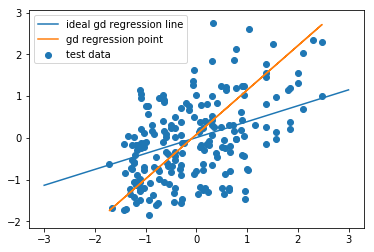

In [188]:
x1 = np.linspace(-3, 3, 5000)

#plt.plot(x1, x1, label='y=x')
#for i, c in enumerate(clf.coef_):
plt.plot(x1, x1*MM + BB, label='ideal gd regression line')
plt.plot(X_test.iloc[:, 0:1], y_pred_gd2, label='gd regression point')
plt.scatter(X_test.iloc[:, 0:1], y_test, label='test data')
plt.legend()
plt.show()

In [189]:
# result

r2_score(y_pred_gd2, y_test)

0.02193234499015284

In [190]:
regResult.loc['gd'] = 0, 0, r2_score(y_pred_gd2, y_test), BB, MM

In [191]:
regResult.assign()

,MSE,Cor,R2,bias,weight
lm1,0.7655,0.249138,0.235807,0.0157957,[0.5022813802064922]
lm2,0.96405,0.023177,-0.00606045,-0.00375544,[0.15532915977897838]
lm3,0.980508,0.00932806,0.0111866,-0.0178152,[-0.09669396866239052]
lm4,0.857075,0.0804218,0.0922353,0.017862,[-0.28435660324929607]
lm5,0.913723,0.142205,0.0975229,0.0135652,[0.37101990219663145]
lm6,0.98242,0.0239016,0.0374892,-0.00548855,[-0.15403414653584202]
lm7,0.899525,0.0318993,0.00877594,0.00176123,[-0.17543898323703913]
lm8,1.04656,0.100481,0.128261,-0.000196854,[0.2992530255089434]
gd,0,0,0.0219323,0.00627681,0.381214


### 這下面是 sklearn 的 Stochastic Gradient Descent Regressor
* 用全部 8 個 input attribute 下去 train，r2_score 可到 0.4

In [26]:
import numpy as np
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train.iloc[:,0:8], y_train)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [159]:
y_pred_sgd = clf.predict(X_test)

In [162]:
print('Coefficients (weight): ', clf.coef_)
print('\nIntercept (bias): ', clf.intercept_)
print('SGD Correlation: ', clf.score(X_train.iloc[:, 0:8], y_train))
print('SGD R2-score: ', r2_score(y_pred_sgd, y_test))


Coefficients (weight):  [ 0.52881552  0.32072559  0.12963155 -0.33615514  0.12330318 -0.07068724
 -0.10755729  0.39562419]

Intercept (bias):  [0.00970866]
SGD Correlation:  0.6031796234798619
SGD R2-score:  0.41395146360842905


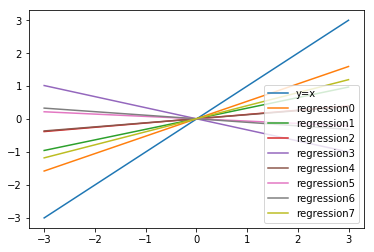

In [163]:
x1 = np.linspace(-3, 3, 5000)

plt.plot(x1, x1, label='y=x')
for i, c in enumerate(clf.coef_):
    plt.plot(x1, c*x1 + clf.intercept_, label='regression'+str(i))
plt.legend()
plt.show()